# EE5907 CA1

<function matplotlib.pyplot.show(close=None, block=None)>

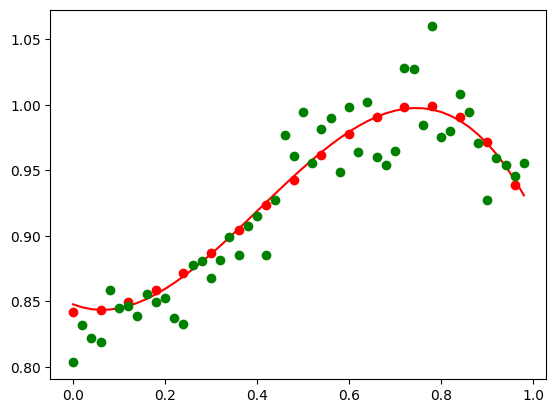

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg
import random

# generate 50 2D-data points
def actual_dis():
    x = np.arange(0,1,0.02)
    y = np.sin(x**2 + 1)
    return x,y

# add Guassian noise
def add_noise(y_origin, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_origin))
    y_noise = y_origin + noise
    return y_noise

# fit the original data
def poly_fitting(x, y, M):
    z = np.polyfit(x, y, M)
    f = np.poly1d(z)
    return f

# generate original data
x_true,y_ture = actual_dis()

# fit on the original data
M1 = 3
f = poly_fitting(x_true, y_ture, M1)
#x_curve = np.linspace(x_true[0], x_true[-1],50)
x_curve = x_true
y_curve = f(x_curve)

# add_noise
y_noise = add_noise(y_curve,0.02)
x_noise = x_curve

# show the plot
plt.plot(x_true, y_ture, 'ro',markevery=3)
plt.plot(x_curve, y_curve, 'red')
plt.plot(x_noise, y_noise, 'go')
plt.show

### Part 1 MAP 

C:\Users\spica\AppData\Local\Temp\ipykernel_30704\3504326320.py:17: LinAlgWarning: Ill-conditioned matrix (rcond=2.3531e-17): result may not be accurate.
  tmp = linalg.solve(mxxo,mx.T)


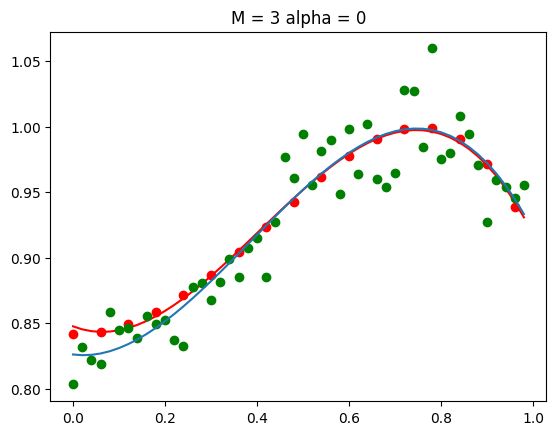

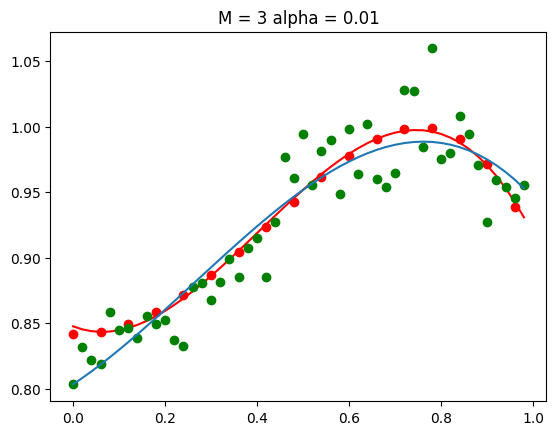

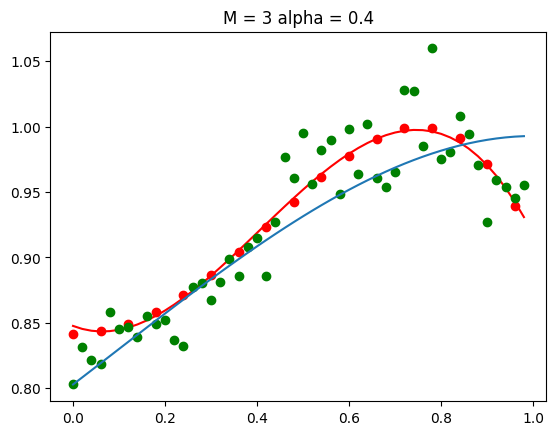

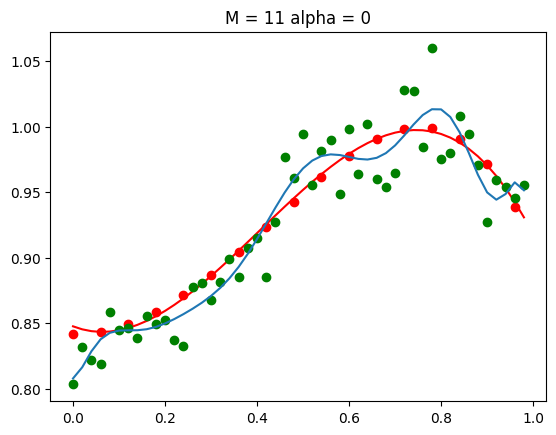

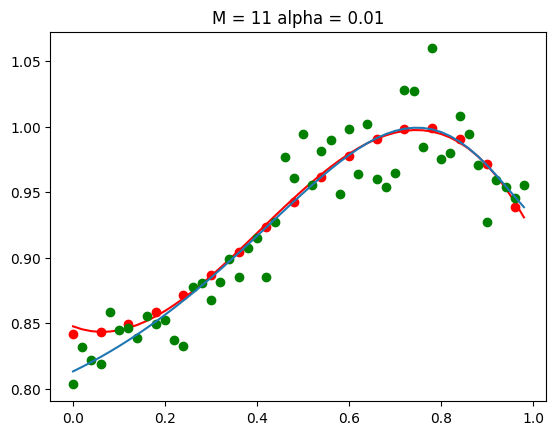

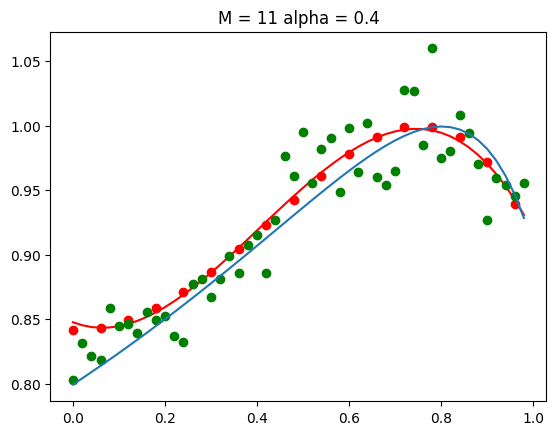

In [4]:

def map_fitting(x,y,M,alpha):
    N = len(x)
    mx = np.zeros([N,M+1])
    vy = np.zeros([N,1])
    ii = np.identity(M+1)
    
    
    # polynomial function
    for n in range(0, N):
        for m in range(0, M+1): 
            mx[n][m] = np.power(x[n],m)
        vy[n][0] = y[n]
    
    # optimization
    mxx = np.dot(mx.T,mx)
    mxxo = mxx + alpha*ii
    tmp = linalg.solve(mxxo,mx.T)
    
    w = np.dot(tmp, vy)
    
    return w

def map_plot(x,w):
    M = len(w)-1
    N = len(x)
    
    mx = np.zeros([N,M+1])
    for n in range(0, N):
        for m in range(0, M+1):
            mx[n][m] = np.power(x[n],m)
    y = np.dot(mx,w)
    return x, y

# draw plots with different parameters M and alpha
temp=1
for M2 in [3,11]:
    for alpha in [0,0.01,0.4]:
        w = map_fitting(x_noise, y_noise, M2, alpha)
        [x_map, y_map] = map_plot(x_curve, w)
        # plot
        temp = temp+1
        plt.figure(temp)
        plt.title("M = "+str(M2)+" alpha = "+str(alpha))
        plt.plot(x_true, y_ture, 'ro',markevery=3)
        plt.plot(x_curve, y_curve, 'red')
        plt.plot(x_noise, y_noise, 'go')
        plt.plot(x_map, y_map)
        plt.show
            

### Part 2 Basis Function

C:\Users\spica\AppData\Local\Temp\ipykernel_30704\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=1.03464e-17): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_30704\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=3.57996e-18): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_30704\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=6.50145e-19): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_30704\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=7.95146e-21): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)
C:\Users\spica\AppData\Local\Temp\ipykernel_30704\418511471.py:23: LinAlgWarning: Ill-conditioned matrix (rcond=4.25081e-20): result may not be accurate.
  tmp = linalg.solve(mphi, phi.T)


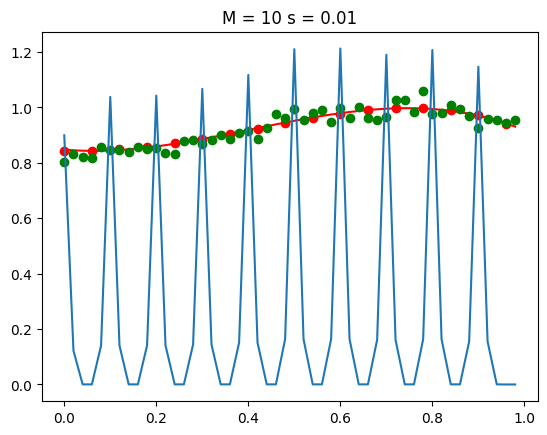

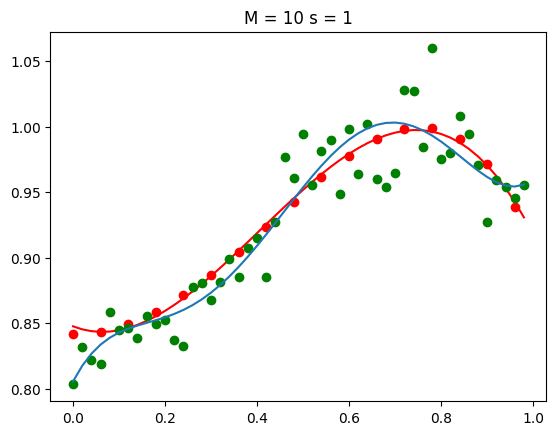

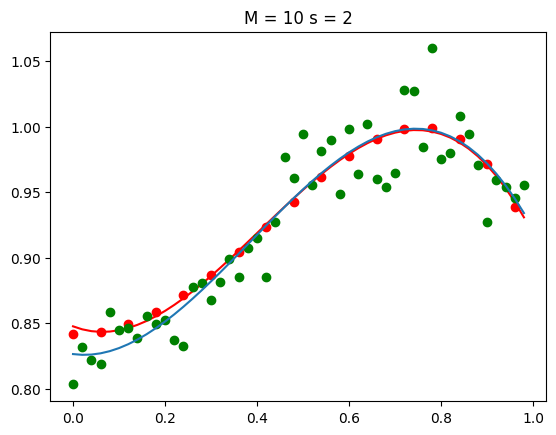

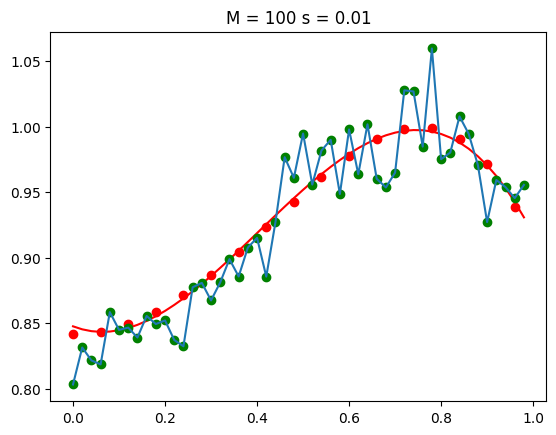

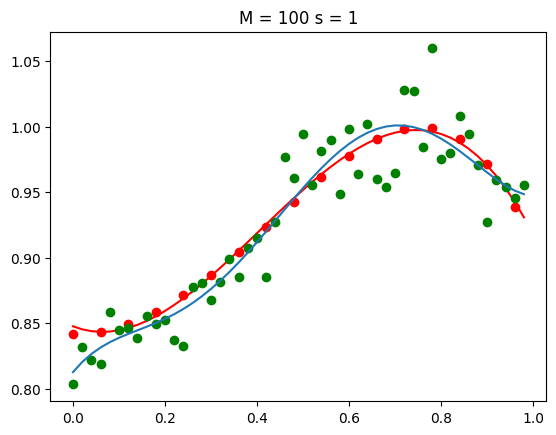

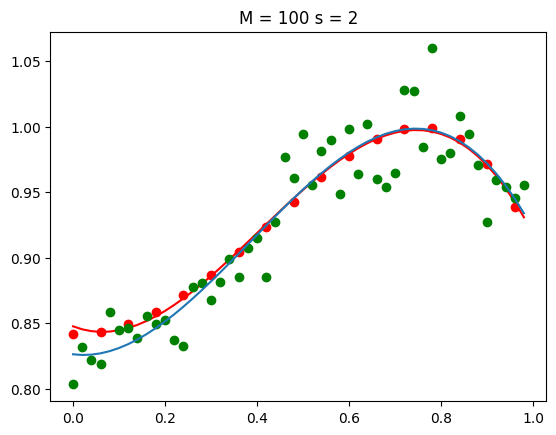

In [5]:
def guassian_basis(x, mu, s):
    return np.exp(-1 * linalg.norm(mu - x)**2 / (2 * s ** 2))

def mle_basis_func(x, y, M, s):
    N = len(x)
    phi = np.zeros([N,M])
    vy = np.zeros([N,1])
    
    # calculate the guassian_basis matrix
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
    
    for n in range(0, N):
        vy[n][0] = y[n]
        
    # mphi = np.dot(phi.T, phi)
    # imphi = linalg.inv(mphi)
    # tmp = np.dot(imphi, phi.T)
    
            
    mphi = np.dot(phi.T, phi)
    tmp = linalg.solve(mphi, phi.T)
    
    # tmp = linalg.pinv(phi)
    w = np.dot(tmp, vy)
    return w, phi

def mle_basis_plot(x,w,s):
    M = len(w)
    N = len(x)
    phi = np.zeros([N,M])
    
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
                
    y = np.dot(phi, w)
    return x, y

temp=1
for M2 in [10,100]:
    for s in [0.01,1,2]:
        [w, phi_guas] = mle_basis_func(x_noise, y_noise, M2, s)
        [x_map, y_map] = mle_basis_plot(x_curve, w, s)
        # plot
        temp = temp+1
        plt.figure(temp)
        plt.title("M = "+str(M2)+" s = "+str(s))
        plt.plot(x_true, y_ture, 'ro',markevery=3)
        plt.plot(x_curve, y_curve, 'red')
        plt.plot(x_noise, y_noise, 'go')
        plt.plot(x_map, y_map)
        plt.show



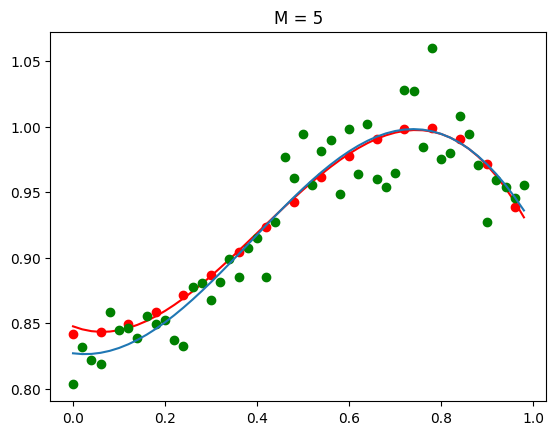

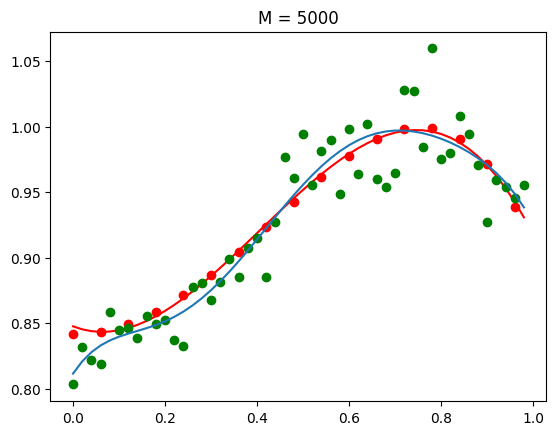

In [6]:
def sigmoid_basis(x, mu ,s):
    sigmoid = 1 / (1 + np.exp(-(x - mu) / s))
    return sigmoid

def mle_sig_basis_func(x, y, M, s):
    N = len(x)
    phi = np.zeros([N,M])
    vy = np.zeros([N,1])
    
    # calculate the guassian_basis matrix
    for m in range(M):
        mu = m / M * x[-1]
        phi[:, m] = np.vectorize(sigmoid_basis)(x, mu ,s)
    
    for n in range(0, N):
        vy[n][0] = y[n]
    
    tmp = linalg.pinv(phi)
    w = np.dot(tmp, vy)
    return w, phi

def mle_sig_basis_plot(x,w,s):
    M = len(w)
    N = len(x)
    phi = np.zeros([N,M])
    
    for m in range(M):
        mu = m / M * x[-1]
        phi[:, m] = np.vectorize(sigmoid_basis)(x, mu ,s)
                
    y = np.dot(phi, w)
    return x, y

temp=1
s = 1
for M2 in [5,5000]:
    [w, phi_sig] = mle_sig_basis_func(x_noise, y_noise, M2 ,s)
    [x_map, y_map] = mle_sig_basis_plot(x_curve, w ,s)
    # plot
    temp = temp+1
    plt.figure(temp)
    plt.title("M = "+str(M2))
    plt.plot(x_true, y_ture, 'ro',markevery=3)
    plt.plot(x_curve, y_curve, 'red')
    plt.plot(x_noise, y_noise, 'go')
    plt.plot(x_map, y_map)
    plt.show

In [7]:
# generate 50 2D-data points
def actual_dis_new():
    x = np.arange(0,9,0.18)
    y = (0.4345 * (x ** 3)) - (5.607 * (x ** 2)) + (16.78 * x) - 10.61
    return x, y

# generate original data
x_true_new,y_ture_new = actual_dis_new()

# fit on the original data
M1 = 3
f = poly_fitting(x_true_new, y_ture_new, M1)
#x_curve = np.linspace(x_true[0], x_true[-1],50)
x_curve_new = x_true_new
y_curve_new = f(x_curve_new)

# add_noise
y_noise_new = add_noise(y_curve_new,2)
x_noise_new = x_curve_new


<function matplotlib.pyplot.show(close=None, block=None)>

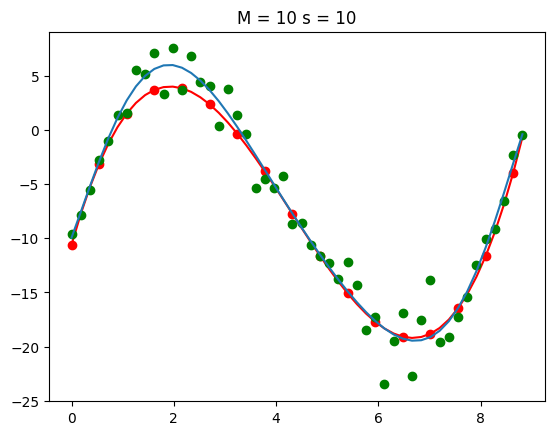

In [8]:
M2 = 10
s = 10
[w, phi_guas] = mle_sig_basis_func(x_noise_new, y_noise_new, M2, s)
[x_map_new, y_map_new] = mle_sig_basis_plot(x_curve_new, w ,s)
# plot
plt.figure(temp)
plt.title("M = "+str(M2)+" s = "+str(s))
plt.plot(x_true_new, y_ture_new, 'ro',markevery=3)
plt.plot(x_curve_new, y_curve_new, 'red')
plt.plot(x_noise_new, y_noise_new, 'go')
plt.plot(x_map_new, y_map_new)
plt.show

### Part 3 Full bayesian regression

<function matplotlib.pyplot.show(close=None, block=None)>

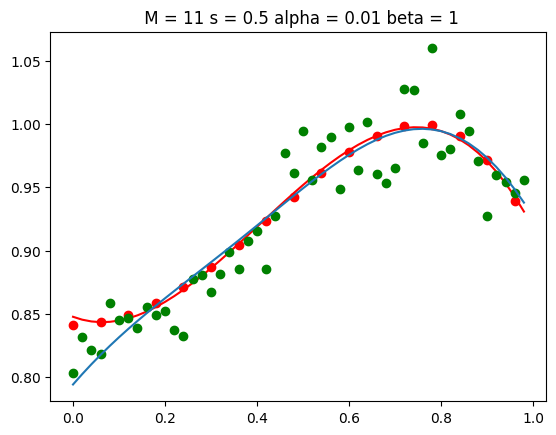

In [9]:
def fb_fitting(x, y, M, s, alpha, beta):
    N = len(x)
    phi = np.zeros([N,M])
    vy = np.zeros([N,1])
    ii = np.identity(M)
    
    # calculate the guassian_basis matrix
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
    
    for n in range(0, N):
        vy[n][0] = y[n]
     
    # optimization
    mphi = np.dot(phi.T,phi)
    mphio = beta * mphi + alpha * ii
    ssn = linalg.solve(mphio,phi.T)
    
    w = beta * np.dot(ssn, vy)

    return w, ssn

def fb_plot(x, w, s):
    M = len(w)
    N = len(x)
    phi = np.zeros([N,M])
    
    for m in range(M):
        mu = m/M
        phi[:, m] = np.vectorize(guassian_basis)(x, mu, s)
                
    y = np.dot(phi, w)
    return x, y

M2 = 11
s = 0.5
alpha = 0.01 
beta =  1

[w, ssn] = fb_fitting(x_noise, y_noise, M2, s, alpha, beta)
[x_map, y_map] = fb_plot(x_curve, w, s)
# plot
plt.figure(temp)
plt.title(" M = " + str(M2) + " s = " + str(s) + " alpha = " + str(alpha) + " beta = " + str(beta))
plt.plot(x_true, y_ture, 'ro',markevery=3)
plt.plot(x_curve, y_curve, 'red')
plt.plot(x_noise, y_noise, 'go')
plt.plot(x_map, y_map)
plt.show



    
    

α and β is the Variance of prior **p(ω)** and likelihood **p(t|ω)**, which will effect the variance of **p(t)** and **p(ω|t)** according to the marginal and conditional guassain disturbution.

The disturbution of the posterior distribution **p(ω|t)** shows how credible is the w we derived. If the desity around the mode is too low, that indicates the prior and likelihood is poor.

### Predictive distribution

In [19]:
def predictive_dis(beta, x, snn, Mn, s, M):
    phi = np.zeros([1,M])
    n = len(x)
    
    for m in range(M):
        mu = m / M
        phi[:, m] = np.vectorize(guassian_basis(x, mu ,s))
        
    sx = 1.0/beta + phi.dot(snn[n-1]).dot(phi)
    Mx = np.dot(Mn[n,:], phi)
    return sx, Mx

def sequence_learning(x, y ,alpha, beta, s, M):
    N = len(x)
    ssn = np.zeros([N, M, M])
    ssn[0, :, :] = linalg.inv(alpha * np.identity(M))
    Mn = np.zeros([M, N])
    
    for n in range(N):
        
        xn = np.zeros(n+1)
        xn = x[:n+1]
        phi = np.zeros([n,M])
        
        for m in range(M):
            mu = m / M 
            phi[:, m] = np.vectorize(guassian_basis)(xn, mu ,s)
            
        issn = linalg.solve(ssn[n,: ,:], np.identity(M)) + beta * np.dot(phi.T, phi)
        ssn[n+1,: ,:] = linalg.solve(issn, np.identity(M))
        tmp = np.dot(linalg.solve(ssn[n, :, :], np.identity(M)), Mn[:, n]) + beta * np.dot(phi.T,y)
        Mn[M, n+1] = ssn[n+1].dot()
    
    return ssn, Mn

def predictive_plot(x, y , s, alpha, beta, M):
    x_new = np.zeros(50)
    y_new = np.zeros(50)
    li = np.arange(50)
    random.shuffle(li)
    pi = 0
    for i in li:
        x_new[pi] = x[i]
        y_new[pi] = y[i]
        pi = pi + 1
    
    [ssn, Mn] = sequence_learning(x_new, y_new, alpha, beta, s, M)
    
    [sx, Mx] = predictive_dis(beta, x_new, ssn, Mn, s, M)
    
    return sx, Mx

s = 1 
alpha = 0.01
beta = 1
M2 = 10
[sx, Mx] = predictive_plot(x_noise, y_noise, s, alpha, beta, M2)
        
        
    

ValueError: shapes (10,0) and (50,) not aligned: 0 (dim 1) != 50 (dim 0)